* [Bike Sharing Demand | Kaggle](https://www.kaggle.com/competitions/bike-sharing-demand)

## 필요한 라이브러리 로드

In [3]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [4]:
train = pd.read_csv("/Users/sabin/Documents/GitHub/kaggle/Bike Sharing Demand/train.csv")

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test = pd.read_csv("/Users/sabin/Documents/GitHub/kaggle/Bike Sharing Demand/test.csv")

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## 전처리
* 연, 월, 일, 시, 분, 초 만들기

In [6]:
train["datetime"] = pd.to_datetime(train["datetime"])
train["datetime"].head(1)

0   2011-01-01
Name: datetime, dtype: datetime64[ns]

In [7]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[['datetime', 'datetime-year', 'datetime-month', 
       'datetime-day', 'datetime-hour','datetime-minute', 
       'datetime-second', "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [8]:
test["datetime"] = pd.to_datetime(test["datetime"])
test["datetime"].head(1)

0   2011-01-20
Name: datetime, dtype: datetime64[ns]

In [9]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[['datetime', 'datetime-year', 'datetime-month', 
       'datetime-day', 'datetime-hour','datetime-minute', 
       'datetime-second', 'datetime-dayofweek']].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


## EDA

<img src="https://upload.wikimedia.org/wikipedia/commons/8/81/Logarithm_plots.png" width="500">


로그(log)는 지수 함수의 역함수이다. 어떤 수를 나타내기 위해 고정된 밑을 몇 번 곱하여야 하는지를 나타낸다고 볼 수 있다.

이른 17세기에 곱하기 및 나누기의 계산을 간편하게 해내기 위해 존 네이피어가 발명한 것으로 알려져 있다. 복잡한 단위의 계산을 간편하게 계산할 수 있다는 장점 때문에, 로그표 및 계산자 등의 발명품과 함께 세계적으로 여러 분야의 학자들에게 널리 퍼졌다.

지수에 대비된다는 의미에서 중국과 일본에서는 대수(對數)로 부르기도 하나, 대수(代數, algebra)와 헷갈리기 쉬우므로 로그라는 용어를 사용하는 것이 일반적이다.


* https://en.wikipedia.org/wiki/Logarithm
* [로그 (수학) - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%A1%9C%EA%B7%B8_(%EC%88%98%ED%95%99))
* [자연로그 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%9E%90%EC%97%B0%EB%A1%9C%EA%B7%B8)
* [상용로그 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9A%A9%EB%A1%9C%EA%B7%B8)

<AxesSubplot:xlabel='count', ylabel='Density'>

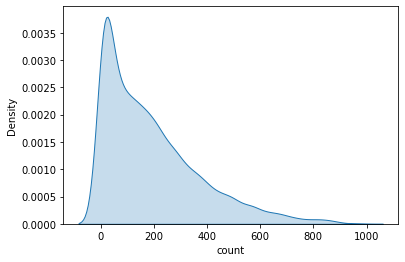

In [10]:
# count - kdeplot
sns.kdeplot(data=train, x="count", shade=True)

In [11]:
# 3 => 9, 300 => 500 MSE 값을 측정 지표로 쓰면 어떤 문제가 있을까요?

In [12]:
train["count"].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

<AxesSubplot:xlabel='count_log1p', ylabel='Density'>

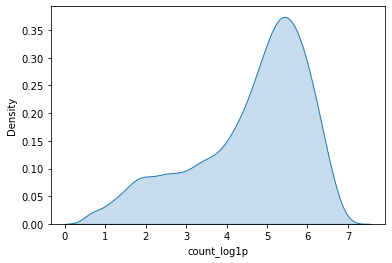

In [13]:
# count log1p( == np.log(count + 1)) - kdeplot
train["count_log1p"] = np.log1p(train["count"])

sns.kdeplot(data=train, x="count_log1p", shade=True)

In [14]:
# np.exp
# np.expm1

In [15]:
# count expm1 - kdeplot
# train["count_expm1"]
# (np.exp(train["count_log1p"])-1) == np.expm1(train["count_log1p"])

In [16]:
train["count_expm1"] = np.expm1(train["count_log1p"])
train[["count", "count_log1p", "count_expm1"]].head()

,count,count_log1p,count_expm1
0,16,2.833213,16.0
1,40,3.713572,40.0
2,32,3.496508,32.0
3,13,2.639057,13.0
4,1,0.693147,1.0


In [17]:
# count, log1p, expm1
train[["count", "count_log1p", "count_expm1"]].describe()

,count,count_log1p,count_expm1
count,10886.000000,10886.000000,10886.000000
mean,191.574132,4.591364,191.574132
std,181.144454,1.419454,181.144454
min,1.000000,0.693147,1.000000
25%,42.000000,3.761200,42.000000
50%,145.000000,4.983607,145.000000
75%,284.000000,5.652489,284.000000
max,977.000000,6.885510,977.000000


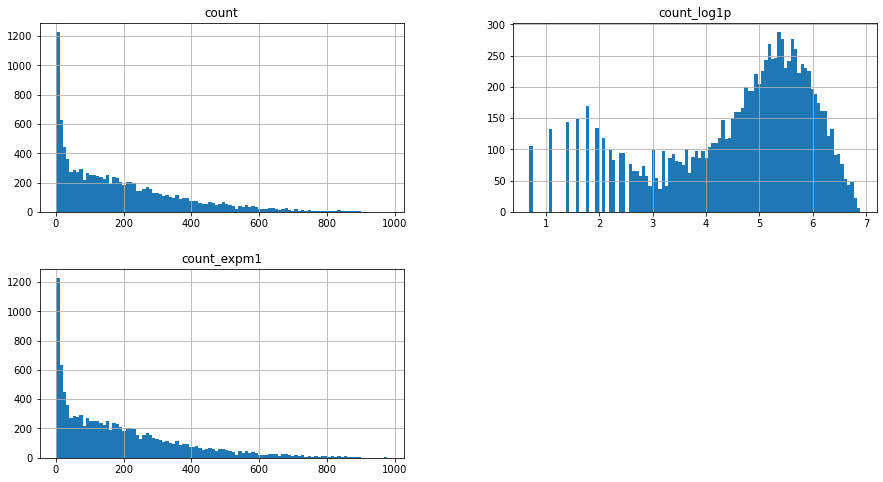

In [18]:
_ = train[["count", "count_log1p", "count_expm1"]].hist(bins=100, figsize=(15, 8))

## 학습, 예측 데이터셋 만들기

<img src="https://i.imgur.com/yvBtRtJ.png" width="600">


* feature_names : 학습(훈련), 예측에 사용할 컬럼을 리스트 형태로 만들어서 변수에 담아줍니다.
* label_name : 정답값

* X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제

* X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
    * 예측에 사용할 데이터셋 예) 실전 시험문제

* y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답

* model : 학습, 예측에 사용할 머신러닝 알고리즘

* model.fit(X_train, y_train) : 학습(훈련), 기출문제와 정답을 가지고 학습(훈련)하는 과정과 유사합니다.

* model.predict(X_test) :  예측, 실제 시험을 보는 과정과 유사합니다. => 문제를 풀어서 정답을 구합니다.

* score
    * 시험을 봤다면 몇 문제를 맞고 틀렸는지 채점해 봅니다.
* metric
    * 점수를 채점하는 공식입니다. (예를 들어 학교에서 중간고사를 봤다면 전체 평균을 계산해 줍니다.)

* submit
    * sample_submission file을 불러옵니다.
    * 예측한 값을 옮겨 적습니다.
    * 캐글에 제출합니다.

In [19]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek',
       'count_log1p', 'count_expm1'],
      dtype='object')

In [20]:
# feature_names : 학습, 예측에 사용할 컬럼명(변수)
feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed',
       'datetime-year', 'datetime-hour', 'datetime-dayofweek']
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [21]:
# label_name : 정답값
label_name = "count_log1p"

In [22]:
# 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제
X_train = train[feature_names]
print(X_train.shape)
X_train.head(2)

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5


In [23]:
# 예측 데이터셋, 예) 실전 시험 문제
X_test = test[feature_names]
print(X_test.shape)
X_test.head(2)

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3


In [24]:
# 학습(훈련)에 사용할 정답값 예) 기출문제의 정답
# log1p
y_train = train[label_name]
y_train.shape

(10886,)

## 머신러닝 알고리즘

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model

RandomForestRegressor(random_state=42)

## GridSearchCV or RandomizedSearchCV

In [26]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [27]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {"n_estimators" : np.random.randint(100, 1000, 100), 
                       "max_depth" : np.random.randint(10, 200, 100)
                      }

reg = RandomizedSearchCV(model, 
                         param_distributions=param_distributions, 
                         n_iter=3, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1)
reg.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': array([ 97, 163,  25,  92, 194, 155, 189, 135,  31, 153, 185,  74, 161,
       169, 128, 180, 102,  55,  67, 149,  22, 161, 158, 130, 145, 183,
       132, 126,  79, 192,  15,  99,  84,  37,  88,  66, 101, 119,  58,
        11,  13,  99, 101, 139, 155, 144, 191, 159, 152, 120, 155,  72,
       155, 110, 104,  73, 162, 183,  42, 121,...
       393, 180, 672, 877, 757, 574, 800, 402, 726, 269, 413, 711, 703,
       525, 299, 167, 866, 704, 109, 363, 202, 183, 610, 657, 519, 166,
       513, 670, 368, 939, 996, 556, 522, 264, 628, 236, 617, 938, 727,
       695, 279, 306, 856, 265, 373, 726, 299, 676, 665, 347, 917, 405,
       726, 419, 412, 530, 513, 639, 596, 231, 990, 788, 273, 979, 675,
       901, 498, 456, 141, 132, 655, 428, 865, 640, 563, 767, 414, 738,
       970, 385, 840, 748, 973, 114, 576, 169, 212])},
       

In [28]:
reg.best_estimator_

RandomForestRegressor(max_depth=47, n_estimators=670, random_state=42)

In [29]:
reg.best_score_

-0.5202345621031145

In [30]:
pd.DataFrame(reg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,16.063111,0.162887,0.611171,0.059941,826,43,"{'n_estimators': 826, 'max_depth': 43}",-0.571397,-0.602727,-0.387882,-0.520669,0.094761,2
1,8.561579,0.086032,0.381219,0.000065,385,126,"{'n_estimators': 385, 'max_depth': 126}",-0.571044,-0.605226,-0.386820,-0.521030,0.095922,3
2,12.675441,1.069891,0.445273,0.094852,670,47,"{'n_estimators': 670, 'max_depth': 47}",-0.571083,-0.602215,-0.387406,-0.520235,0.094780,1


## 학습과 예측

In [40]:
y_predict = np.exp(reg.predict(X_test))

<AxesSubplot:>

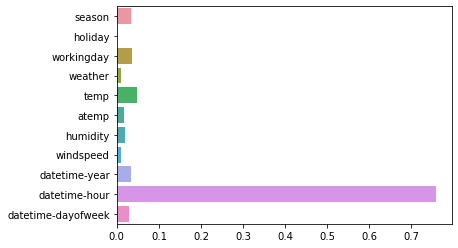

In [41]:
sns.barplot(x=reg.best_estimator_.feature_importances_, y=reg.feature_names_in_)

## Submit

In [42]:
# 답안지 양식을 불러옵니다.
df_submit = pd.read_csv("/Users/sabin/Documents/GitHub/kaggle/Bike Sharing Demand/sampleSubmission.csv")
df_submit.shape

(6493, 2)

In [43]:
# 예측한 값을 답안지에 옮겨 적습니다.
df_submit['count'] = y_predict

In [44]:
# 캐글에 제출하기 위해 csv 파일로 저장합니다.
df_submit.to_csv('my_sub.csv',index=False)

In [ ]:
# 파일 저장이 제대로 되었는지 확인합니다.
